In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder


In [10]:
df = pd.read_csv("house.csv")
df.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,price
0,5912,2,3,2,yes,yes,yes,yes,no,0,2249957
1,5767,3,2,1,yes,no,yes,no,no,0,8365337
2,6307,5,3,3,yes,yes,no,yes,yes,3,2811315
3,7940,4,3,1,no,yes,no,yes,no,2,6843180
4,6575,2,1,2,no,yes,yes,yes,no,2,5803481


In [11]:
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()



,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,price
0,5912,2,3,2,1,1,1,1,0,0,2249957
1,5767,3,2,1,1,0,1,0,0,0,8365337
2,6307,5,3,3,1,1,0,1,1,3,2811315
3,7940,4,3,1,0,1,0,1,0,2,6843180
4,6575,2,1,2,0,1,1,1,0,2,5803481


In [12]:
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"✅ Mean Absolute Error: ₹{mae:,.2f}")
print(f"✅ Mean Absolute Percentage Error: {mape:.2%}")


✅ Mean Absolute Error: ₹2,014,089.81
✅ Mean Absolute Percentage Error: 61.19%


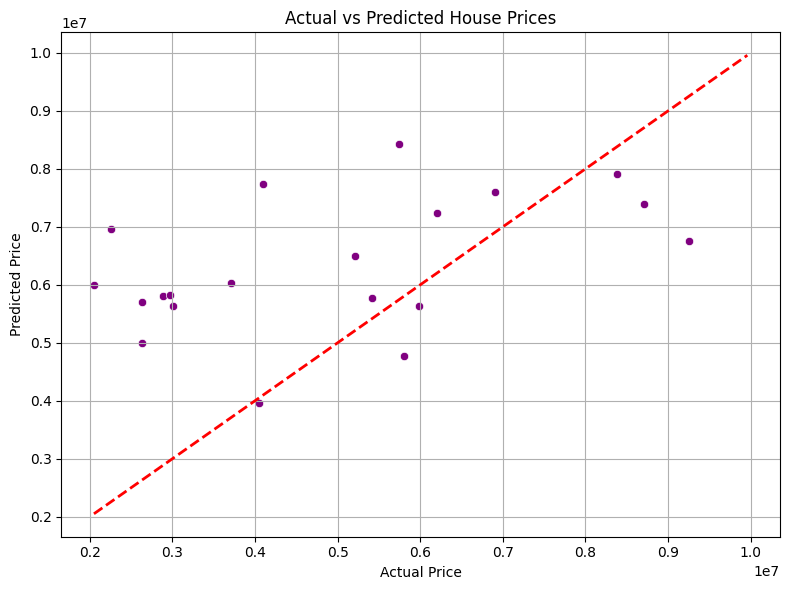

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


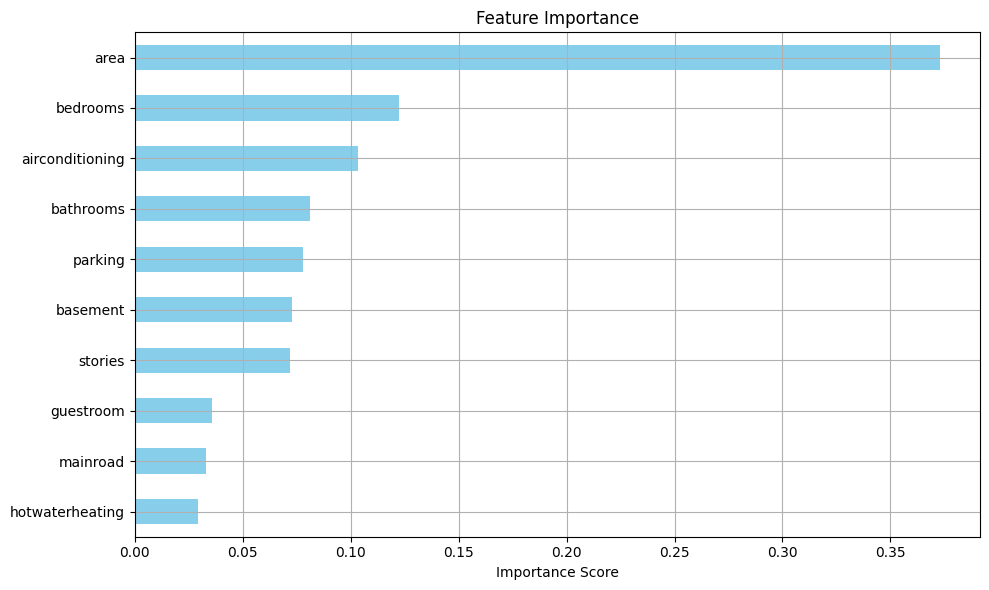

In [16]:
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()
